### HW 2

**Processing Data Lab Part I**: Can you create df_ctr which is a data frame that captures the click through rate or CTR of each age group? CTR is defined as clicks/impressions * 100. Which age group has the highest CTR? Why do you think so? Why do you think there are people aged 0 in the dataset?

**Processing Data Lab Part II**: Put together the NYT data from 30 different files into one file. Run df.shape and report the dimensions of your final dataframe.

**Processing Data Lab Part III**: Come up with one new visualization for the nyt1 file. Feel free to use the data file you've put together in Lab Part II if you like, it just takes longer to run.

**Regression Part** 
Assemble the cleaned up aggregation nytimes data

1. Generate a new model using the log of brain and body, which we know generated a much better distribution and cleaner set of data. Compare the results to the model using the raw data (a few examples are given below). Remember that exp() can be
used to "normalize" our "logged" values. ***Note: Make sure you start a new linear regression object!***

2. Using your aggregate data compiled from nytimes1-30.csv, write a python script that determines the best model predicting CTR based off of age and gender. Since gender is not actually numeric (it is binary), investigate ways to vectorize this feature. ***Clue: you may want two features now instead of one.***

3. Compare this practice to making two separate models based on Gender --- that is, separate models for men and women --- with Age as your one feature predicting CTR. How are your results different? Which results would you be more confident in presenting to your manager? Why's that?

4. Evaluate what data you could still use to improve your nytimes model. Consider plotting your model to service your explanations and write a short blurb about insights gained and next steps in your "data collection."

***

### Processing Data Lab Part I
Can you create df_ctr which is a data frame that captures the click through rate or CTR of each age group? CTR is defined as clicks/impressions * 100. Which age group has the highest CTR? Why do you think so? Why do you think there are people aged 0 in the dataset?

Note that this is only using Part 1 of the NYT data versus the full dataset.

In [1]:
%matplotlib inline
import csv
import requests
import numpy as np
import pandas as pd
from random import randint
from __future__ import division
import matplotlib.pyplot as plt

In [2]:
# Run the curl command if you don't have the data already 
# Go to where you want to store this data and run pwd to get the location
!curl http://stat.columbia.edu/~rachel/datasets/nyt1.csv > /Users/mtlee/Code/DAT_mtl/nytimes.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4805k  100 4805k    0     0  1274k      0  0:00:03  0:00:03 --:--:-- 1274k


In [3]:
# Replace this with your path
df = pd.read_csv('/Users/mtlee/Code/DAT_mtl/nytimes.csv')

In [4]:
df.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


In [5]:
df.describe()

,Age,Gender,Impressions,Clicks,Signed_In
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930
std,23.607034,0.481997,2.239349,0.309973,0.457851
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000


In [6]:
df.shape

(458441, 5)

In [7]:
def map_age_category(x):
    """
    Function that groups users by age.
    """
    if x == 0:
        return 0
    elif x < 18:
        return 1
    elif x < 25:
        return 2
    elif x < 32:
        return 3
    elif x < 45:
        return 4
    else:
        return 5

In [8]:
df['age_categories'] = df['Age'].apply(map_age_category)

df[['age_categories']].describe()

,age_categories
count,458441.000000
mean,2.744600
std,2.056163
min,0.000000
25%,0.000000
50%,3.000000
75%,5.000000
max,5.000000


So there were two different ways that people thought about this. Neither is wrong, but they are different metrics

- The first way is to group the data by age_categories and then sum the Impressions and Clicks overall in each age_categories. Then to calculate the CTR by dividing overall Impressions by overall Clicks in each of the age_categories.
- The second way is to calculate a CTR for each individual and then average those within each of the age_categories.

In [9]:
# Create the average impressions and clicks for each age.
cols  = ['age_categories', 'Impressions', 'Clicks']
df_ctr = df[cols].groupby(['age_categories']).sum().reset_index()

In [10]:
df_ctr

,age_categories,Impressions,Clicks
0,0,685483,19480
1,1,69239,2065
2,2,203585,2167
3,3,209538,2121
4,4,436797,4478
5,5,690917,12138


In [11]:
df_ctr['CTR_overall']=(df_ctr['Clicks']/df_ctr['Impressions']*100).round(decimals=2)

In [12]:
df_ctr.sort_values(by="CTR_overall", ascending=False)

,age_categories,Impressions,Clicks,CTR_overall
1,1,69239,2065,2.98
0,0,685483,19480,2.84
5,5,690917,12138,1.76
2,2,203585,2167,1.06
4,4,436797,4478,1.03
3,3,209538,2121,1.01


Calculated this way, we see age categories 1 (1-17) and 0 (age 0... hmm) having the highest CTR.

Now let's try calculating the other way...

In [13]:
df['Individual_CTR'] = 100*df['Clicks'].astype('float').div(df['Impressions'].astype('float'),axis='index')
df['Individual_CTR'].describe()

count    455375.000000
mean          1.847053
std           6.903449
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: Individual_CTR, dtype: float64

In [14]:
# Create the average individual CTR for each age.
cols  = ['age_categories', 'Individual_CTR']
df_ctr_2 = df[cols].groupby(['age_categories']).mean().reset_index()

In [15]:
df_ctr_2.sort_values(by="Individual_CTR", ascending=False)

,age_categories,Individual_CTR
1,1,3.027722
0,0,2.835491
5,5,1.746032
2,2,1.073376
4,4,1.030909
3,3,1.004526


While we get slightly different numbers, the result here is the same. Age category 1 followed by age category 0 have the highest click through rates.

- Maybe younger people and kids are more likely to click on ads because they don't understand them. See examples of kids making lots of in app purchases in games.
- Age 0 is weird... Let's look more at what may be going on. 

In [16]:
df_zeros_age = df[df.Age==0]
df_zeros_age.head(10)

,Age,Gender,Impressions,Clicks,Signed_In,age_categories,Individual_CTR
6,0,0,7,1,0,0,14.285714
10,0,0,8,1,0,0,12.500000
12,0,0,4,0,0,0,0.000000
15,0,0,6,0,0,0,0.000000
19,0,0,5,0,0,0,0.000000
24,0,0,4,0,0,0,0.000000
39,0,0,7,2,0,0,28.571429
41,0,0,4,0,0,0,0.000000
46,0,0,3,0,0,0,0.000000
47,0,0,7,0,0,0,0.000000


Note that all the observations (people) with Age = 0 also have Gender = 0. Looks like this denotes missing data.

In [17]:
# Check to see that all the obs with Age = 0 also have Gender = 0 
df_zeros_age['Gender'].describe()

count    137106
mean          0
std           0
min           0
25%           0
50%           0
75%           0
max           0
Name: Gender, dtype: float64

### Processing Data Lab Part II:

Put together the NYT data from 30 different files into one file. Run df.shape and report the dimensions of your final dataframe.

In [18]:
# First I created a file called nytfiles and curled all 30 files

import pandas as pd
import glob

path =r'/Users/mtlee/Code/DAT_mtl/nytfiles/' # use your path
allFiles = glob.glob(path + "/nyt*.csv")

# frame will be the final df
# list will be a list of individual csv files to be concatenated
frame = pd.DataFrame()
list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)

frame = pd.concat(list_, axis=0)

In [19]:
len(frame)

14465753

In [20]:
frame.shape

(14465753, 5)

## Processing Data Lab Part II
Come up with one new visualization for the nyt1 file. Feel free to use the data file you've put together in Lab Part II if you like, it just takes longer to run.

In [21]:
df.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,27,1,3,0,1
1,14,1,4,0,1
2,29,1,4,0,1
3,0,0,7,0,0
4,35,1,7,0,1


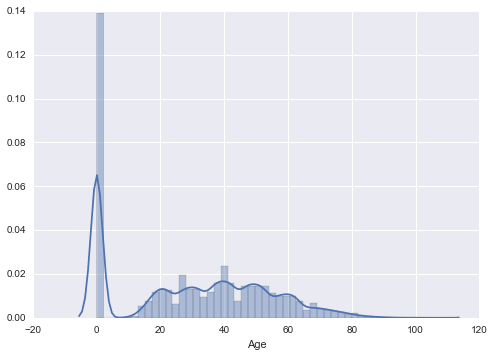

In [22]:
# This plot reinforces our guess that the 0 age individuals are missing age
import seaborn as sns
sns.distplot(df['Age']);

In [23]:
df_ctr_2.head()

,age_categories,Individual_CTR
0,0,2.835491
1,1,3.027722
2,2,1.073376
3,3,1.004526
4,4,1.030909


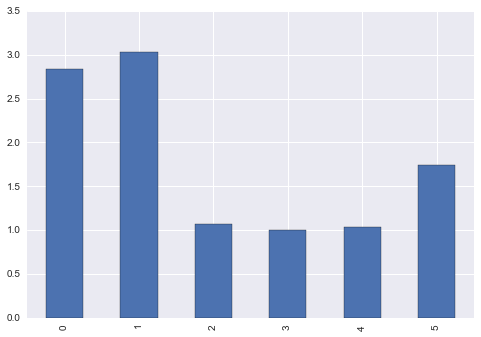

In [24]:
# This is visualizing what we found earlier... age category 0 and 1 have highest mean CTR's 
df_ctr_2['Individual_CTR'].plot(kind='bar');

## Regression Part
Assemble the cleaned up aggregation nytimes data

1. Generate a new model using the log of brain and body, which we know generated a much better distribution and cleaner set of data. Compare the results to the model using the raw data (a few examples are given below). Remember that exp() can be
used to "normalize" our "logged" values. ***Note: Make sure you start a new linear regression object!***

Take the mammal data and fit both a linear model to the original data and then to the log transformed x's and y's.

For the predictions, we can get predictions for the original brain values. We can also get the predictions for log_brain and then take e and raise it to the log_brain power to get brain predictions.

In [25]:
from sklearn import linear_model

# Replace with the location of your csv
mammals = pd.read_csv('/Users/mtlee/Code/DAT_mtl/mammals.csv')

lm = linear_model.LinearRegression()
log_lm = linear_model.LinearRegression()

In [26]:
# grab features
body = [ [x] for x in mammals['body'].values]
brain = mammals['brain'].values

log_body = [ [x] for x in np.log(mammals['body'].values)]
log_brain = np.log(mammals['brain'].values)

In [27]:
# Fit linear models
lm.fit(body, brain)

log_lm.fit(log_body, log_brain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
lm.predict(body)
mammals['predict'] = lm.predict(body)
mammals['predict'].head()

0     94.275986
1     91.468314
2     92.309166
3    540.425207
4    126.117209
Name: predict, dtype: float64

In [29]:
log_lm.predict(log_body)
mammals['log_predict'] = np.exp(log_lm.predict(log_body))
mammals['log_predict'].head()

0     21.144078
1      4.869905
2     10.594903
3    855.487784
4    125.879932
Name: log_predict, dtype: float64

In [30]:
mammals.head()

,Name,body,brain,predict,log_predict
0,Arctic fox,3.385,44.5,94.275986,21.144078
1,Owl monkey,0.480,15.5,91.468314,4.869905
2,Mountain beaver,1.350,8.1,92.309166,10.594903
3,Cow,465.000,423.0,540.425207,855.487784
4,Grey wolf,36.330,119.5,126.117209,125.879932


In [31]:
round(lm.score(body, brain),3)

0.873

In [32]:
round(log_lm.score(log_body, log_brain),3)

0.921

Looking at R^2, looks like the log model does better. Matches up with what we saw when graphing both of them.

/Applications/anaconda/envs/my_env_2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


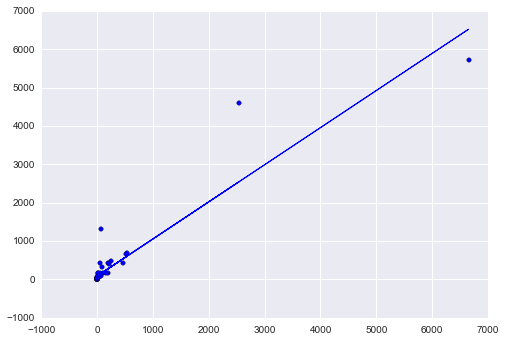

In [33]:
plt.scatter(body, brain)
plt.plot(body, lm.predict(body), color='blue', linewidth=1)

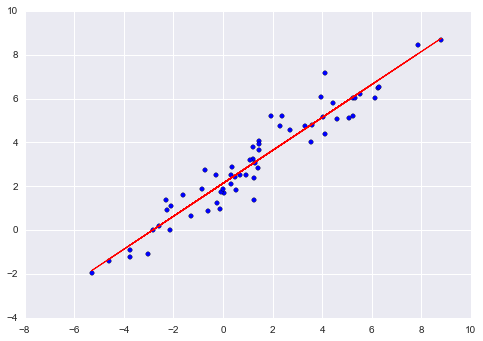

In [34]:
from numpy import log

mammals['body'] = log(mammals['body'])
mammals['log_brain'] = log(mammals['brain'])

plt.scatter(log_body, log_brain)
plt.plot(log_body, log_lm.predict(log_body), color='red', linewidth=1)
plt.show()

In [35]:
print "Let's interpret our results for the non-log model: " 

print "For an animal with body weight as 0, we expect it to have brain weight of " + str(round(lm.intercept_,2)) + "."

print "For an increase of 1 in body weight, we expect an increase of " + str(round(lm.coef_[0],2)) + " in the animal's brain weight."

Let's interpret our results for the non-log model: 
For an animal with body weight as 0, we expect it to have brain weight of 91.0.
For an increase of 1 in body weight, we expect an increase of 0.97 in the animal's brain weight.


In [36]:
print "Let's interpret our results for the log model: " 

print "For an animal with log of its body weight as 0, we expect it to have log brain weight of " + str(round(log_lm.intercept_,2)) + "."

print "For an increase of 1 in log of body weight, we expect an increase of " + str(round(log_lm.coef_[0],2)) + " in log of brain weight."

Let's interpret our results for the log model: 
For an animal with log of its body weight as 0, we expect it to have log brain weight of 2.13.
For an increase of 1 in log of body weight, we expect an increase of 0.75 in log of brain weight.


# NYT data regression

2. Using your aggregate data compiled from nytimes1-30.csv, write a python script that determines the best model predicting CTR based off of age and gender. Since gender is not actually numeric (it is binary), investigate ways to vectorize this feature. ***Clue: you may want two features now instead of one.***

In [37]:
frame.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


OK so I'm not sure what it wants you to do in terms of "vectorizing" the data, so I'm just fitting a linear regression with gender and age predicting individual CTR. And then I will interpret the coefficients and intercept.

In [38]:
# Create individual level CTR data, this will be our outcome to predict

frame['CTR_new'] = 100*frame['Clicks'].astype('float').div(frame['Impressions'].astype('float'),axis='index')
frame['CTR_new'].describe()

count    14368701.000000
mean            1.957311
std             7.116836
min             0.000000
25%             0.000000
50%             0.000000
75%             0.000000
max           100.000000
Name: CTR_new, dtype: float64

In [39]:
# Now let's get rid of observations with CTR_new as NaN
# This is a division by zero issue and we can't run the regression with them

NaN_mask = [not i for i in pd.isnull(frame.CTR_new)]
df_nyt_drop_NaN_1 = frame[NaN_mask]
print len(df_nyt_drop_NaN_1)

14368701


In [40]:
df_nyt_drop_NaN_1.describe()

,Age,Gender,Impressions,Clicks,Signed_In,CTR_new
count,14368701.000000,14368701.000000,14368701.000000,14368701.000000,14368701.000000,14368701.000000
mean,26.145179,0.322048,5.033459,0.098537,0.621087,1.957311
std,24.137322,0.467261,2.205085,0.320218,0.485116,7.116836
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,5.000000,0.000000,1.000000,0.000000
75%,46.000000,1.000000,6.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,21.000000,6.000000,1.000000,100.000000


Now remove the missing data points. Why? Because we know those age values and gender values are not actual zeros so adding them to our linear model will mess up our predictions for the more "real" data.

In [41]:
df_nyt_drop_NaN = df_nyt_drop_NaN_1[df_nyt_drop_NaN_1.Age>0]
len(df_nyt_drop_NaN)

8924220

In [42]:
from sklearn.linear_model import LinearRegression

# create X and y
feature_cols = ['Gender', 'Age']
X = df_nyt_drop_NaN[feature_cols]
y = df_nyt_drop_NaN.CTR_new

# instantiate, fit
lm_nyt = LinearRegression()
lm_nyt.fit(X, y)
print lm_nyt.intercept_, lm_nyt.coef_

0.576200433077 [-0.0053927   0.02014332]


In [43]:
lm_nyt.intercept_

0.57620043307690538

Interpret the intercept: For an female aged 0, their average individual CTR is 0.58. Not a really meaningful interpretation because we're not interested in people with age near or at 
0.

In [44]:
print lm_nyt.coef_[0]
print lm_nyt.coef_[1]

-0.00539270226083
0.0201433228632


Interpret the coefficients: Holding age constant, on average, a female has a CTR that is 0.005 higher than a male.

Holding gender constant, a one year increase in age would result in an increase of 0.02 in predicted CTR.

Neither coefficient seems particularly different than 0 and age seems to have more of an effect than gender. But you'd use hypothesis testing to test to make sure (p-values, etc.).

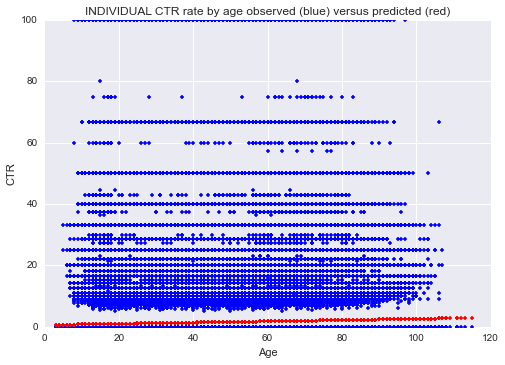

In [206]:
#plot the male and female fit vs age
plt.plot(df_nyt_drop_NaN["Age"].values, df_nyt_drop_NaN.CTR_new,'b.')
plt.plot(df_nyt_drop_NaN["Age"].values, lm_nyt.predict(X),'r.')
plt.xlabel('Age')
plt.ylabel('CTR')
plt.title('INDIVIDUAL CTR rate by age observed (blue) versus predicted (red)')

plt.show()

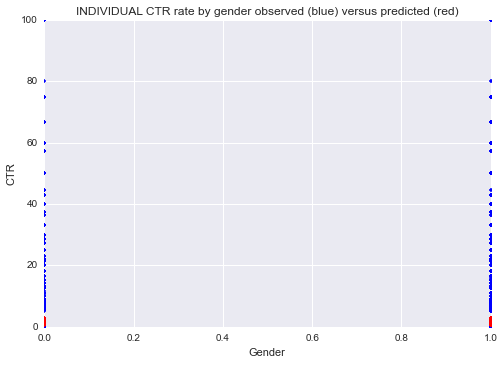

In [52]:
#plot the male and female fit vs gender
plt.plot(df_nyt_drop_NaN["Gender"].values, df_nyt_drop_NaN.CTR_new,'b.')
plt.plot(df_nyt_drop_NaN["Gender"].values, lm_nyt.predict(X),'r.')
plt.xlabel('Gender')
plt.ylabel('CTR')
plt.title('INDIVIDUAL CTR rate by gender observed (blue) versus predicted (red)')

plt.show()

In [157]:
# The above might seem confusing because our guesses are nowhere near
# the real CTR values for the data.
# Does this distribution help you explain why our predictions are so low?
# Perhaps we don't have the right features or age and gender are not
# linearly related to CTR.
print df_nyt_drop_NaN.CTR_new.describe()
print pd.DataFrame(lm_nyt.predict(X)).describe()

count    8924220.000000
mean           1.421354
std            6.040055
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max          100.000000
Name: CTR_new, dtype: float64
                    0
count  8924220.000000
mean         1.421354
std          0.329120
min          0.631238
25%          1.154964
50%          1.402077
75%          1.643797
max          2.892683
0.00296910969297


In [158]:
# Also note that the R^2 here is tiny
# In this dataset, age and gender account for little of the variation

print lm_nyt.score(X,y)

0.00296910969297


3. Compare this practice to making two separate models based on Gender --- that is, separate models for men and women --- with Age as your one feature predicting CTR. How are your results different? Which results would you be more confident in presenting to your manager? Why's that?

In [45]:
df_male = df_nyt_drop_NaN[df_nyt_drop_NaN['Gender']==1]
len(df_male)

4627411

In [46]:
df_female = df_nyt_drop_NaN[df_nyt_drop_NaN['Gender']==0]
len(df_female)

4296809

In [47]:
# create X and y for males
feature_cols = ['Age']
X_male = df_male[feature_cols]
y_male = df_male.CTR_new

# instantiate, fit
lm_male = LinearRegression()
lm_male.fit(X_male, y_male)
print lm_male.intercept_, lm_male.coef_
print "R squared male value " + str(lm_male.score(X_male, y_male))

0.822734528509 [ 0.01397517]
R squared male value 0.00136179406223


In [48]:
# create X and y for females
feature_cols = ['Age']
X_female = df_female[feature_cols]
y_female = df_female.CTR_new

# instantiate, fit
lm_female = LinearRegression()
lm_female.fit(X_female, y_female)
print lm_female.intercept_, lm_female.coef_
print "R squared female value " + str(lm_female.score(X_female, y_female))

0.320538783939 [ 0.02602807]
R squared female value 0.00512159126752


So yes these results are different than the previous model. Let's interpret:

A male aged zero has an average CTR of 0.82. An increase in one year of age for males results in an increase of 0.01 in predicted CTR.

A female aged zero has an average CTR of 0.32. An increase in one year of age for females results in an increase of 0.03 in predicted CTR.

While you might be tempted to see this result and say that gender may affect CTR, remember that we might have more older folks in the male group or other differences in age distribution between men and women. So I like the first model better because it controls for age in doing a comparison between men and women and finds a 0.005 difference in gender. 

4. Evaluate what data you could still use to improve your nytimes model. Consider plotting your model to service your explanations and write a short blurb about insights gained and next steps in your "data collection."

Note that our model is going to predict 0 almost all of the time... that is because more than 75% of our data is 0's. Maybe we can look into getting more data with clicks. We can also try different types of models. This is an issue with sparse data (as in almost everyone is 0). We could try a logistic model to predict CTR = 0 or CTR > 0. 

## SEE THE NEXT MODEL AT THE END OF THIS NOTEBOOK.

In terms of data collection, we could collect information on the type of ad that the person saw (perhaps a link to a features article or sports article could be received differently). Also we could possibly track what the person read on the website.

Here's another interpretation of CTR used in a model. As Click Through Rate is often not looked at on an individual basis, (https://en.wikipedia.org/wiki/Click-through_rate) I pooled together all the observations within a certain age and gender and then calculated a CTR rate for those people. In this way, there are fewer 0's and it ends up looking possibly linear.  

In [53]:
# Create the average impressions and clicks for each age.
cols2  = ['Age', 'Gender', 'Impressions', 'Clicks']
frame_compressed = df_nyt_drop_NaN[cols2].groupby(['Age', 'Gender'], as_index=False).sum()

In [57]:
print frame_compressed.head(20)

    Age  Gender  Impressions  Clicks   CTR_new
0     3       0            2       0  0.000000
1     3       1            2       0  0.000000
2     4       0            8       0  0.000000
3     5       0           32       0  0.000000
4     5       1           27       2  7.407407
5     6       0           59       2  3.389831
6     6       1          112       4  3.571429
7     7       0          277      12  4.332130
8     7       1          560      19  3.392857
9     8       0          814      21  2.579853
10    8       1         1715      58  3.381924
11    9       0         2043      54  2.643172
12    9       1         4641     153  3.296703
13   10       0         5451     163  2.990277
14   10       1        11841     372  3.141627
15   11       0        12816     363  2.832397
16   11       1        26634     798  2.996170
17   12       0        26705     792  2.965737
18   12       1        55492    1644  2.962589
19   13       0        48117    1485  3.086227


In [58]:
frame_compressed['CTR_new']=100*frame_compressed['Clicks'].astype('float').div(frame_compressed['Impressions'].astype('float'),axis='index')
frame_compressed['CTR_new'].describe()

count    217.000000
mean       2.171263
std        1.360052
min        0.000000
25%        1.003748
50%        2.067146
75%        2.999549
max        8.000000
Name: CTR_new, dtype: float64

In [59]:
# create X and y
feature_cols = ['Age','Gender']
X_comp = frame_compressed[feature_cols]
y_comp = frame_compressed.CTR_new

# instantiate, fit
lm_nyt_comp = LinearRegression()
lm_nyt_comp.fit(X_comp, y_comp)
print lm_nyt_comp.intercept_, lm_nyt_comp.coef_

1.31264722209 [ 0.01311526  0.21736012]


In [60]:
# Still really low R squared, about 10% 
# However, much higher than before.
print lm_nyt_comp.score(X_comp, y_comp)

0.0982205241733


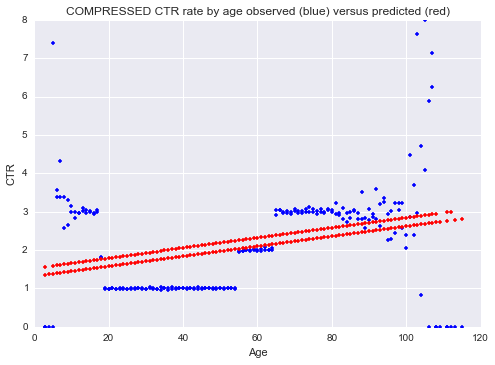

In [207]:
# Plot the fit vs age
# See that there is a possible linear relationship
plt.plot(frame_compressed["Age"].values, frame_compressed.CTR_new,'b.')
plt.plot(frame_compressed["Age"].values, lm_nyt_comp.predict(X_comp),'r.')
plt.xlabel('Age')
plt.ylabel('CTR')
plt.title('COMPRESSED CTR rate by age observed (blue) versus predicted (red)')

plt.show()

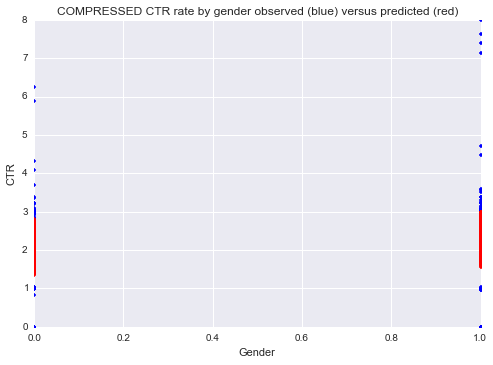

In [61]:
# Plot the fit vs gender
plt.plot(frame_compressed["Gender"].values, frame_compressed.CTR_new,'b.')
plt.plot(frame_compressed["Gender"].values, lm_nyt_comp.predict(X_comp),'r.')

plt.xlabel('Gender')
plt.ylabel('CTR')
plt.title('COMPRESSED CTR rate by gender observed (blue) versus predicted (red)')

plt.show()

Even though this model isn't terribly amazing (R-squared is 10% versus a "good" R squared which we've seen up to 80% or 90%) however, it is much higher than the R squared we got when we took individual CTR (R-squared of about .13%). And looks more linear.